In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from math import inf
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install pyngrok
import pyngrok # import the pyngrok module
from pyngrok import ngrok

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Question 1 : Part -1 Implement and analyze word count.

Basic word count program

In [ ]:
if 'sc' in locals():
    sc.stop()
conf = SparkConf().setAppName("WordCountCode").setMaster("local")
sc = SparkContext(conf=conf)

In [ ]:
lines = sc.textFile("Book_1.txt").union(sc.textFile("Book_2.txt"))
counts_basic = (
    lines
    .flatMap(lambda line: line.split() if line else [])
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [ ]:
counts_basic_collected = counts_basic.collect()

with open('output_1.txt', 'w') as f:
    f.write("[")
    for word, count in counts_basic_collected:
        f.write(f"('{word}': {count}), ")
    f.write("]")

print("Output saved as output_1.txt as list of key value pairs")

Output saved as output_1.txt as list of key value pairs


In [ ]:
t = 0
with open("output_1.txt", "r") as f:
  for line in f:
    t = t + 1
    print(line)
    if(t==10):
      break


[('The': 395), ('Project': 158), ('of': 4399), ('Old': 22), ('ebook': 4), ('is': 667), ('use': 56), ('anyone': 8), ('anywhere': 9), ('in': 2613), ('United': 33), ('States': 17), ('other': 187), ('world': 65), ('at': 895), ('no': 364), ('restrictions': 4), ('whatsoever.': 5), ('may': 170), ('it,': 127), ('give': 109), ('away': 56), ('re-use': 4), ('this': 735), ('online': 8), ('are': 297), ('have': 714), ('check': 10), ('country': 32), ('where': 147), ('before': 146), ('using': 18), ('eBook.': 4), ('Author:': 2), ('Congreve': 41), ('Editor:': 1), ('G.': 2), ('date:': 2), ('1,': 2), ('[eBook': 2), ('#1192]': 1), ('January': 4), ('11,': 1), ('2015': 1), ('Language:': 2), ('English': 22), ('Transcribed': 2), ('edition': 2), ('(_Comedies': 2), ('1_)': 2), ('Price': 1), ('***': 8), ('OF': 21), ('GUTENBERG': 6), ('OLD': 5), ('BACHELOR:': 2), ('ccx074@pglaf.org': 1), ('[Picture:': 1), ('Mr.': 132), ('Congreve]': 1), ('INTRODUCTION': 1), ('I.': 12), ('known': 29), ('Congreve’s': 20), ('as': 142

Extended word count

In [ ]:
# Load NLTK's English stop words
nltk_stop_words = set(stopwords.words('english'))
print(nltk_stop_words)

{'is', 'couldn', 'those', 'by', 'd', 'they', "couldn't", 'were', 'nor', 'have', 'until', "isn't", 'themselves', 'weren', 'll', 'which', "wasn't", 'both', 'whom', "it's", 'over', 'these', "don't", 'yourselves', 'during', 'where', 'did', "mightn't", 'her', 'other', 'myself', 'what', "shan't", 'are', "doesn't", 'why', 'himself', 'hadn', "won't", 'i', 'off', 'needn', 'you', 'mustn', 'again', 'can', 'but', 'do', 'or', 'who', 'below', 'any', 'herself', 'his', "you'll", 'as', 'hers', 'through', 'out', "wouldn't", 'too', 'most', "you've", 'more', 'if', 'didn', 'there', 've', "weren't", 're', "she's", 'same', 'above', 'aren', 'ours', 'from', "needn't", 'few', 'doing', 'wouldn', 'while', 'being', 'all', "you're", "didn't", 'in', 'wasn', 'with', 'such', "haven't", 'very', 'under', 'between', 'don', 's', "mustn't", 'this', 'shan', 'the', 'itself', 'only', 'once', 'y', 'had', "hadn't", 'after', 'him', 'that', 'its', 'now', 'isn', 'against', 'doesn', 'for', 'on', 'no', "should've", 'she', 'own', 'be

In [ ]:
counts_extended = (
    lines
    .flatMap(lambda line: line.split())
    .map(lambda word: word.lower())
    .map(lambda word: word.translate(str.maketrans("", "", string.punctuation)))
    .filter(lambda word: word not in nltk_stop_words and word != '')
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
    .sortBy(lambda x: x[1], ascending=False)
)

In [ ]:
counts_extended_collected = counts_extended.collect()

with open('output_1_extended.txt', 'w') as f:
    f.write("[")
    for word, count in counts_extended_collected:
        f.write(f"('{word}': {count}), ")
    f.write("]")

print("Output saved as output_1_extended.txt as list of key value pairs")

Output saved as output_1_extended.txt as list of key value pairs


In [ ]:
with open("output_1_extended.txt", "r") as f:
  for line in f:
    print(line)


[('one': 879), ('would': 485), ('time': 414), ('well': 407), ('could': 358), ('man': 357), ('know': 340), ('little': 308), ('said': 288), ('come': 278), ('sir': 274), ('see': 268), ('much': 258), ('way': 255), ('like': 241), ('work': 235), ('great': 234), ('never': 226), ('good': 221), ('old': 214), ('upon': 208), ('day': 208), ('think': 207), ('say': 206), ('get': 206), ('life': 204), ('might': 202), ('always': 185), ('may': 184), ('two': 181), ('dont': 178), ('make': 174), ('things': 174), ('yet': 173), ('go': 170), ('project': 168), ('even': 164), ('new': 162), ('thing': 161), ('first': 160), ('must': 156), ('long': 155), ('another': 155), ('still': 155), ('mr': 153), ('bell': 153), ('something': 151), ('us': 150), ('made': 150), ('came': 148), ('love': 140), ('take': 138), ('ye': 138), ('many': 136), ('anything': 132), ('really': 132), ('back': 132), ('men': 131), ('look': 130), ('years': 129), ('people': 129), ('nothing': 129), ('sharp': 128), ('world': 126), ('right': 125), ('lat

1a. Finding the 25 Most Common Words

In [ ]:
print("Top 25 most common words:")
for word, count in counts_extended_collected[:25]:
    print(f"{word}: {count}")

Top 25 most common words:
one: 879
would: 485
time: 414
well: 407
could: 358
man: 357
know: 340
little: 308
said: 288
come: 278
sir: 274
see: 268
much: 258
way: 255
like: 241
work: 235
great: 234
never: 226
good: 221
old: 214
upon: 208
day: 208
think: 207
say: 206
get: 206


In [ ]:
# https://dashboard.ngrok.com/auth
authtoken = "2odaNVr4bHYfaumRhkJVaB01GUS_7fijEi5bsKRs1QQaENdKA"
ngrok.set_auth_token(authtoken)
spark = SparkSession.builder.master("local[*]").appName("WordCountCode").getOrCreate()
public_url = ngrok.connect(addr='http://localhost:4040')
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://4b6c-35-234-0-59.ngrok-free.app" -> "http://localhost:4040"


Dag visulaizations and The execution is broken up into 7 stages in total. Stages 5 and 2 skipped

In [ ]:
sc.stop()

# Question 2 - Part-2 Implement and analyze Dijakstra’s Shortest Path algorithm.

In [ ]:
import random

# Function to generate random weights for edges
def generate_weights(num_nodes):
    weights = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = random.randint(1, 10)
            weights.append((i, j, weight))
    return weights

# Function to write edges with random weights to a text file
def write_weights_to_file(weights, filename):
    with open(filename, "w") as file:
        for edge in weights:
            file.write("{}, {}, {}\n".format(edge[0], edge[1], edge[2]))
    print(f"Random weights saved to {filename}")

# Main function
def main():
    num_nodes = 100
    weights1 = generate_weights(num_nodes)
    weights2 = generate_weights(num_nodes)

    write_weights_to_file(weights1, "question2_1.txt")
    write_weights_to_file(weights2, "question2_2.txt")

if __name__ == "__main__":
    main()

Random weights saved to question2_1.txt
Random weights saved to question2_2.txt


code

In [ ]:
from pyspark import SparkContext, SparkConf
if 'sc' in locals():
    sc.stop()
conf = SparkConf().setAppName("DijkstraShortestPathCode")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

edges_rdd_1 = sc.textFile("question2_1.txt")
edges_rdd_2 = sc.textFile("question2_2.txt")

edges_rdd_1 = edges_rdd_1.map(lambda line: line.strip().split(",")).map(lambda parts: ((int(parts[0]), int(parts[1])), float(parts[2])))
edges_rdd_2 = edges_rdd_2.map(lambda line: line.strip().split(",")).map(lambda parts: ((int(parts[0]), int(parts[1])), float(parts[2])))

combined_edges_rdd = edges_rdd_1.union(edges_rdd_2).reduceByKey(lambda x, y: x + y)
sorted_edges_rdd = combined_edges_rdd.sortByKey()  # to observe the op clean
# o/p - ((0,1), 17)
final_edges_rdd = sorted_edges_rdd.map(lambda x: (x[0][0], (x[0][1], x[1])))


In [ ]:
final_edges_rdd.sortByKey().take(5)

[(0, (1, 7.0)), (0, (2, 14.0)), (0, (3, 11.0)), (0, (4, 12.0)), (0, (5, 13.0))]

In [ ]:
source_node = final_edges_rdd.first()[0]
distances_rdd = sc.parallelize([(source_node, 0)])  # Source node with distance 0
other_nodes = final_edges_rdd.flatMap(lambda x: [x[0], x[1][0]]).distinct().filter(lambda node: node != source_node)
infinity_distances = other_nodes.map(lambda node: (node, inf))
# Combine source node distance with other nodes set to infinity
distances_rdd = distances_rdd.union(infinity_distances)

In [ ]:
distances_rdd.sortByKey().take(5)

[(0, 0), (1, inf), (2, inf), (3, inf), (4, inf)]

In [ ]:
val = final_edges_rdd.first()[0]
source_node_distance = distances_rdd.filter(lambda x: x[0] == val).first()[1]
queue = distances_rdd.filter(lambda x: x[1] == source_node_distance)
print(queue.collect())
graph_rdd = final_edges_rdd.groupByKey().mapValues(list)
# queue = distances_rdd.filter(lambda x: x[0] == distances_rdd.first())
# print(queue.collect())
prev_distances = distances_rdd
# print(queue.isEmpty())
while not queue.isEmpty():
  current_element = queue
  print(current_element.collect())
  current_element = current_element.join(graph_rdd)
  # current_element.collect()
  updated_dist = current_element.flatMap(lambda x: [(neighbor, x[1][0] + weight) for neighbor, weight in x[1][1]])
  # x[1][0] is used to access the current distance of the node (dist)
  new_distances_rdd = prev_distances.union(updated_dist)
  min_distance_rdd = new_distances_rdd.reduceByKey(min)
  changed_rdd = min_distance_rdd.join(prev_distances).filter(lambda x: x[1][0] < x[1][1])
  queue = changed_rdd.map(lambda x: (x[0], min(x[1][0], x[1][1]))).sortByKey()
  prev_distances = min_distance_rdd


[(0, 0)]
[(0, 0)]
[(1, 7.0), (2, 14.0), (3, 11.0), (4, 12.0), (5, 13.0), (6, 13.0), (7, 8.0), (8, 14.0), (9, 6.0), (10, 4.0), (11, 15.0), (12, 6.0), (13, 8.0), (14, 16.0), (15, 12.0), (16, 11.0), (17, 6.0), (18, 19.0), (19, 13.0), (20, 8.0), (21, 7.0), (22, 8.0), (23, 6.0), (24, 12.0), (25, 17.0), (26, 12.0), (27, 10.0), (28, 12.0), (29, 11.0), (30, 9.0), (31, 13.0), (32, 10.0), (33, 13.0), (34, 10.0), (35, 16.0), (36, 7.0), (37, 8.0), (38, 12.0), (39, 13.0), (40, 7.0), (41, 12.0), (42, 11.0), (43, 6.0), (44, 12.0), (45, 18.0), (46, 9.0), (47, 13.0), (48, 12.0), (49, 14.0), (50, 12.0), (51, 4.0), (52, 5.0), (53, 8.0), (54, 13.0), (55, 11.0), (56, 12.0), (57, 13.0), (58, 10.0), (59, 13.0), (60, 8.0), (61, 8.0), (62, 7.0), (63, 7.0), (64, 9.0), (65, 3.0), (66, 6.0), (67, 6.0), (68, 14.0), (69, 17.0), (70, 15.0), (71, 16.0), (72, 18.0), (73, 4.0), (74, 8.0), (75, 7.0), (76, 9.0), (77, 12.0), (78, 11.0), (79, 12.0), (80, 15.0), (81, 13.0), (82, 11.0), (83, 4.0), (84, 11.0), (85, 12.0), (86

In [ ]:
# for result in prev_distances.sortByKey().collect():
#     print(result)

prev_distances.sortByKey().take(10)

[(0, 0),
 (1, 7.0),
 (2, 14.0),
 (3, 11.0),
 (4, 12.0),
 (5, 13.0),
 (6, 13.0),
 (7, 8.0),
 (8, 14.0),
 (9, 6.0)]

In [ ]:
shortest_distance = prev_distances.collect()
with open('output_2.txt', 'w') as f:
    f.write("[\n")
    for node, distance in shortest_distance:
        f.write(f"({node}, {distance})\n")
    f.write("]")

print("Shortest paths written to output_2.txt")

Shortest paths written to output_2.txt


In [ ]:
shortest_distance = shortest_distance[1:]

In [86]:
longest = max(shortest_distance, key=lambda x: x[1])
nearest = min(shortest_distance, key=lambda x: x[1])

print("Node with the greatest distance is :", longest)
print("Node with the least distance is :", nearest)

Node with the greatest distance is : (11, 15.0)
Node with the least distance is : (65, 3.0)


In [87]:
# https://dashboard.ngrok.com/auth
authtoken = "2odaNVr4bHYfaumRhkJVaB01GUS_7fijEi5bsKRs1QQaENdKA"
ngrok.set_auth_token(authtoken)
spark = SparkSession.builder.master("local[*]").appName("DijkstraShortestPathCode").getOrCreate()
public_url = ngrok.connect(addr='http://localhost:4040')
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://065a-35-234-0-59.ngrok-free.app" -> "http://localhost:4040"


In [ ]:
sc.stop()

# Part-3 Implement and analyze Page-rank algorithm.

File ''question3.txt' created successfully.


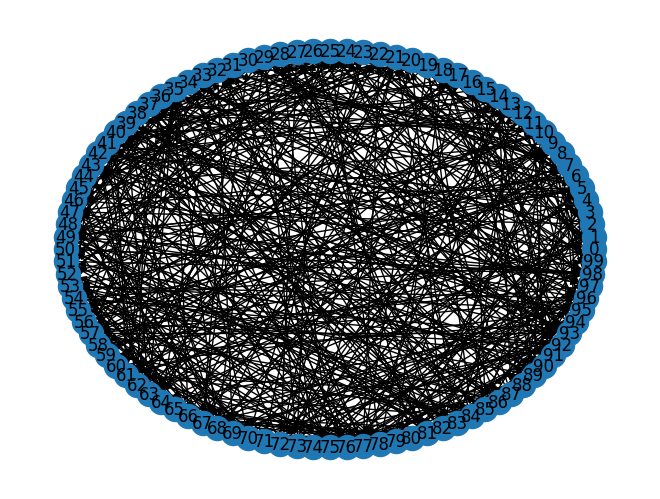

In [79]:
import random
import networkx as nx

# Function to generate random link data
def generate_link_data(num_nodes):
    link_data = {}
    for node in range(num_nodes):
        num_links = random.randint(1, min(10, num_nodes - 1))
        links = random.sample(range(num_nodes), num_links)
        links = [link for link in links if link != node]
        link_data[node] = links
    link_graph = nx.DiGraph(link_data)
    labels = dict((n, str(n)) for n in link_graph.nodes())
    nx.draw_circular(link_graph, labels = labels)
    return link_data

# Function to write link data to a text file
def write_link_data_to_file(link_data, filename):
    with open(filename, 'w') as file:
        for node, links in link_data.items():
            file.write("{}: {}\n".format(node, links))

# Main function
def main():
    num_nodes = 100
    link_data = generate_link_data(num_nodes)

    # Write link data to a file
    write_link_data_to_file(link_data, 'question3.txt')

    print("File ''question3.txt' created successfully.")

if __name__ == "__main__":
    main()


Considering all has same page rank

In [89]:
from pyspark import SparkContext, SparkConf
if 'sc' in locals():
    sc.stop()
conf = SparkConf().setAppName("PageRankCode").setMaster("local")
sc = SparkContext(conf=conf)

pages_rdd = sc.textFile("question3.txt")
pages_rdd = pages_rdd.map(lambda line: line.split(": ")).map(lambda parts: (int(parts[0]), eval(parts[1].strip()))).cache()
pages_rdd.take(5)

[(0, [57, 22, 61, 21, 7, 89]),
 (1, [7, 2, 80, 65, 85, 4, 61]),
 (2, [76, 24, 11, 47, 99, 96, 74, 6, 41]),
 (3, [96, 76, 69]),
 (4, [64, 56])]

In [90]:
convg_factor = 1e-6
damp_factor = 0.85

In [91]:
num_pages = pages_rdd.count()
ranks_rdd = pages_rdd.map(lambda node_neighbors: (node_neighbors[0], 1.0 / num_pages))
ranks_rdd.take(5)

[(0, 0.01), (1, 0.01), (2, 0.01), (3, 0.01), (4, 0.01)]

In [92]:
max_diff = float("inf")
diff_rdd = float("inf")
num_itr = 0
while True:
    num_itr += 1
    test_join = pages_rdd.join(ranks_rdd)
    # test_join.take(5)
    contributions_rdd = test_join.flatMap(lambda node_neighbors_rank: [(neighbor, node_neighbors_rank[1][1] / len(node_neighbors_rank[1][0])) for neighbor in node_neighbors_rank[1][0]])
    # contributions_rdd.sortByKey().take(9)
    new_ranks_rdd = contributions_rdd.reduceByKey(lambda x, y: x + y).mapValues(lambda rank: damp_factor * rank + (1 - damp_factor) / num_pages)
    # new_ranks_rdd.sortByKey().take(5)
    diff_rdd = new_ranks_rdd.join(ranks_rdd).mapValues(lambda x: abs(x[0] - x[1]))
    max_diff = diff_rdd.map(lambda x: x[1]).sum()
    print(f"max differnce: {max_diff} in current iteration: {num_itr} ")
    if max_diff < convg_factor:
        print("Convergence achieved.")
        break
    ranks_rdd = new_ranks_rdd


max differnce: 0.37477579365079366 in current iteration: 1 
max differnce: 0.14340611515810026 in current iteration: 2 
max differnce: 0.06497198101013789 in current iteration: 3 
max differnce: 0.028051144969736114 in current iteration: 4 
max differnce: 0.01196561971620894 in current iteration: 5 
max differnce: 0.0054769527061524935 in current iteration: 6 
max differnce: 0.0023462116815639923 in current iteration: 7 
max differnce: 0.001063223816047051 in current iteration: 8 
max differnce: 0.0004150304019185573 in current iteration: 9 
max differnce: 0.0001766957416476124 in current iteration: 10 
max differnce: 7.199954525059088e-05 in current iteration: 11 
max differnce: 3.0046431956108188e-05 in current iteration: 12 
max differnce: 1.2199679827998647e-05 in current iteration: 13 
max differnce: 5.126332438372665e-06 in current iteration: 14 
max differnce: 2.302991902144655e-06 in current iteration: 15 
max differnce: 9.187947756362884e-07 in current iteration: 16 
Convergen

In [96]:
final_ranks = ranks_rdd.collect()
sorted_ranks = sorted(final_ranks, key=lambda x: x[0])
with open("output_page_ranks.txt", "w") as output_file:
    output_file.write("[\n")
    for node, rank in sorted_ranks:
        output_file.write(f"({node}, {rank})\n")
    output_file.write("]")



In [95]:
final_ranks = ranks_rdd.collect()
highest_rank_node = max(final_ranks, key=lambda a: a[1])
lowest_rank_node = min(final_ranks, key=lambda a: a[1])

print("Node with highest PageRank:", highest_rank_node)
print("Node with lowest PageRank:", lowest_rank_node)

Node with highest PageRank: (5, 0.030867921406272515)
Node with lowest PageRank: (3, 0.0025510326373976025)


In [97]:
authtoken = "2odaNVr4bHYfaumRhkJVaB01GUS_7fijEi5bsKRs1QQaENdKA"
ngrok.set_auth_token(authtoken)
spark = SparkSession.builder.master("local[*]").appName("PageRankCode").getOrCreate()
public_url = ngrok.connect(addr='http://localhost:4040')
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://faba-35-234-0-59.ngrok-free.app" -> "http://localhost:4040"


In [ ]:
sc.stop()